# Linear Regression Model Using Tensorflow

This is my attempt at a linear regression model with the use of Tensorflow and Gradient Descent as an optimizer.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab

### Data

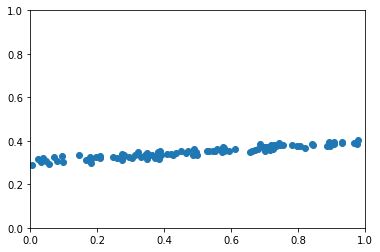

In [2]:
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data))
y_data = x_data * 0.1 + 0.3 + noise


plt.scatter(x_data, y_data)
plt.xlim(xmax=1,xmin=0)
plt.ylim(ymax=1,ymin=0)
plt.show()

### Variables

In [3]:
W = tf.Variable(tf.random_uniform([1],0.0,1.0),name='weight')
b = tf.Variable(tf.zeros([1]),name='bias')
y = W * x_data + b

print(W.name)
print(b.name)

weight:0
bias:0


### Training Graph

In [4]:
loss = tf.reduce_mean(tf.square(y-y_data)) #MSE
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

print('Loss:',loss)
print('Optimizer:',optimizer)
print('Train:',train)

Loss: Tensor("Mean:0", shape=(), dtype=float32)
Optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x000001F1C68915C0>
Train: name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_weight/ApplyGradientDescent"
input: "^GradientDescent/update_bias/ApplyGradientDescent"



In [5]:
sess = tf.Session()
sess.run(init)
y_initial_values = sess.run(y)

print(sess.run([W, b]))

[array([ 0.46583354], dtype=float32), array([ 0.], dtype=float32)]


### Training

In [6]:
trained_values = {}
counter = 0
for iteration in (range(60)):

    sess.run(train)
    if iteration % 7 == 0:
        print('iteration:'+str(iteration),sess.run([W,b]))
        trained_values['counter'+str(counter)] = sess.run(y)
        counter = counter + 1
print(sess.run([W, b]))

iteration:0 [array([ 0.49873623], dtype=float32), array([ 0.11785926], dtype=float32)]
iteration:7 [array([ 0.35942292], dtype=float32), array([ 0.16306502], dtype=float32)]
iteration:14 [array([ 0.27316284], dtype=float32), array([ 0.20835678], dtype=float32)]
iteration:21 [array([ 0.21494591], dtype=float32), array([ 0.23892267], dtype=float32)]
iteration:28 [array([ 0.17565571], dtype=float32), array([ 0.25955135], dtype=float32)]
iteration:35 [array([ 0.14913905], dtype=float32), array([ 0.2734735], dtype=float32)]
iteration:42 [array([ 0.13124314], dtype=float32), array([ 0.28286946], dtype=float32)]
iteration:49 [array([ 0.11916533], dtype=float32), array([ 0.28921074], dtype=float32)]
iteration:56 [array([ 0.11101408], dtype=float32), array([ 0.29349041], dtype=float32)]
[array([ 0.1083899], dtype=float32), array([ 0.2948682], dtype=float32)]


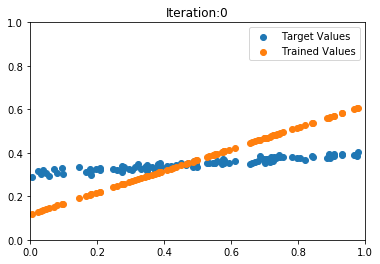

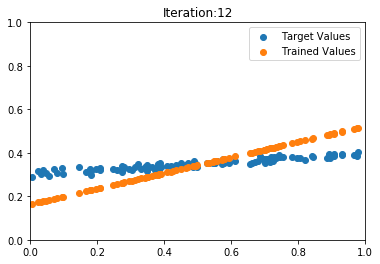

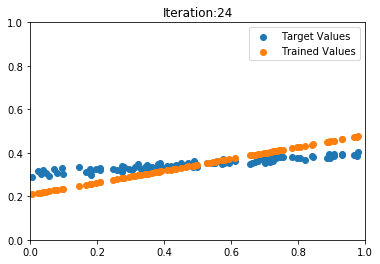

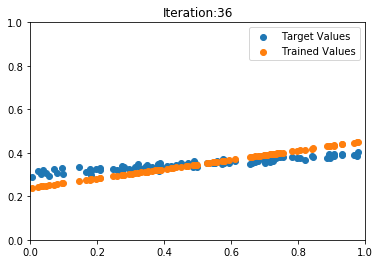

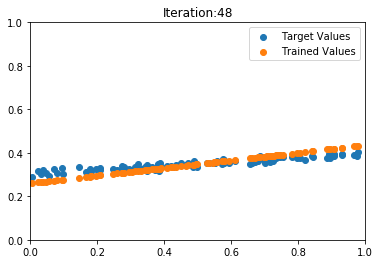

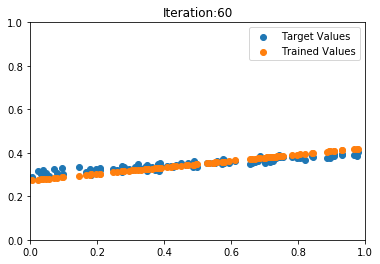

In [7]:

for plot in range(0,6):
    plt.title("Iteration:"+str(plot*12))
    plt.scatter(x_data, y_data,label="Target Values")
    plt.scatter(x_data, trained_values['counter' + str(plot)] ,label="Trained Values")
    plt.legend(loc=1)
    plt.xlim(xmax=1,xmin=0)
    plt.ylim(ymax=1,ymin=0)
    plt.show()
